### Data Wrangling Project

The objective of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The dataset that I wrangled (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.

In [214]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
import os
import re
import warnings
warnings.simplefilter('ignore')

In [215]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [216]:
pd.set_option('display.max_colwidth', -1)

### Gathering the Data

There are three tables; arc - The WeRateDogs Twitter archive
tweet_count - given by Udacity and downloaded from Twitter's API using tweepy
image_pred

In [217]:
arc = pd.read_csv('twitter-archive-enhanced.csv')

In [218]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [219]:
cons_key = 'HIDDEN'
cons_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(cons_key, cons_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = arc.tweet_id.values
len(tweet_ids)


2356

In [220]:
# function for tweet extraction
# file already created, there is no need to execute to continue 
def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [221]:
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [222]:
tweet_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

In [223]:
# Downloading the image predictions
folder_name = 'image_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [224]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [225]:
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

### Assessing

Visuals

In [226]:
arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [227]:
arc.text.sample(2)

194    RT @dog_rates: Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug…
761    This is Stanley. He has too much skin. Isn't happy about it. Quite pupset actually. Still 11/10 would comfort https://t.co/hhTfnPrWfb       
Name: text, dtype: object

In [228]:
tweet_count.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [229]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


There are few format problems with the image_pred and missing values in arc table. tweet_count and arch will be merged

In [230]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

tweet_id should be object
timestamp should be a datetime64

In [231]:
doggo = arc.doggo.value_counts()
floofer = arc.floofer.value_counts()
pupper = arc.pupper.value_counts()
puppo = arc.puppo.value_counts()
print(doggo); 
print(floofer); 
print(pupper); 
print(puppo)


None     2259
doggo    97  
Name: doggo, dtype: int64
None       2346
floofer    10  
Name: floofer, dtype: int64
None      2099
pupper    257 
Name: pupper, dtype: int64
None     2326
puppo    30  
Name: puppo, dtype: int64


Wrong dog names

In [232]:
arc.name.value_counts().head(20)

None       745
a          55 
Charlie    12 
Cooper     11 
Oliver     11 
Lucy       11 
Penny      10 
Tucker     10 
Lola       10 
Winston    9  
Bo         9  
Sadie      8  
the        8  
an         7  
Toby       7  
Bailey     7  
Buddy      7  
Daisy      7  
Rusty      6  
Stanley    6  
Name: name, dtype: int64

'None', 'a' and 'an' got taken out of context.

In [233]:
arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [234]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [235]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Summary

Quality

-archive Table
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls coloms have missing values
floofer should be  'floof'
tweet_id should be object
timestamp should be a datetime64 
Missing information for dog stages.
Many missing names from the list under 'None', and random names like 'a' and 'an' might be parts of strings that got taken out of context.

-tweet_count Table
The column id_str should be  tweet_id so merging will be easier.

-image_pred Table

p1, p2, and p3 have some upper and lowercase letters.
The tweet_id column should be dtype 


Three tables will eventually be merged into one

### Cleaning

In [236]:
# renamed in order to make shorter when coding
arc_clean = arc.copy()
image_clean = image_pred.copy()
tweet_clean = tweet_count.copy()

In [237]:
drop_retweet = arc_clean[pd.notnull(arc_clean['retweeted_status_id'])].index
drop_reply = arc_clean[pd.notnull(arc_clean['in_reply_to_status_id'])].index

retweeted_status_id and in_reply_to_status_id columns are removed from the DataFrame

In [238]:
arc_clean.drop(index=drop_retweet, inplace=True)
arc_clean.drop(index=drop_reply, inplace=True)

In [239]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [240]:
arc_clean.dropna(axis='columns',how='any', inplace=True)

In [241]:
arc_clean.drop(columns='source', inplace=True)

In [242]:
arc_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


Columns removed with missing values using dropna() method

In [243]:
tweet_clean.rename(index=str, columns={"id_str": "tweet_id"}, inplace=True)
arc_clean.rename(columns={"floofer": "floof", "rating_numerator": "rate_num", "rating_denominator": "rate_denom"}, inplace=True)

In [244]:
tweet_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


In [245]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id      2097 non-null int64
timestamp     2097 non-null object
text          2097 non-null object
rate_num      2097 non-null int64
rate_denom    2097 non-null int64
name          2097 non-null object
doggo         2097 non-null object
floof         2097 non-null object
pupper        2097 non-null object
puppo         2097 non-null object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


In the tweet_clean column name id_str changed to tweet_id 
In the archive_clean table, column name floofer renamed as  "floof" 


In [246]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
arc_clean['timestamp'] = pd.to_datetime(arc_clean['timestamp'])
arc_clean['tweet_id'] = arc_clean['tweet_id'].astype('str')

In [247]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [248]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id      2097 non-null object
timestamp     2097 non-null datetime64[ns]
text          2097 non-null object
rate_num      2097 non-null int64
rate_denom    2097 non-null int64
name          2097 non-null object
doggo         2097 non-null object
floof         2097 non-null object
pupper        2097 non-null object
puppo         2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 180.2+ KB


In the image_clean table, change the column tweet_id to object
In the archive_clean table, change the column timestamp to datetime 
In the archive_clean table, change the column tweet_id to object 

In [249]:
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

In [250]:
image_clean.p1.head()

0    welsh_springer_spaniel
1    redbone               
2    german_shepherd       
3    rhodesian_ridgeback   
4    miniature_pinscher    
Name: p1, dtype: object

In [251]:
image_clean.p2.head()

0    collie            
1    miniature_pinscher
2    malinois          
3    redbone           
4    rottweiler        
Name: p2, dtype: object

In [252]:
image_clean.p3.head()

0    shetland_sheepdog  
1    rhodesian_ridgeback
2    bloodhound         
3    miniature_pinscher 
4    doberman           
Name: p3, dtype: object

p1, p2, and p3 are converting all the names to lowercase letters.

In [253]:
arc_clean['text'] = arc_clean.text.str.replace("&amp;", "&")
arc_clean['text'] = arc_clean.text.str.replace("\n", " ")
arc_clean['text'] = arc_clean.text.str.replace(r"http\S+", "")
arc_clean['text'] = arc_clean.text.str.strip()

In [254]:
arc_clean.query("text == '&amp;'")

,tweet_id,timestamp,text,rate_num,rate_denom,name,doggo,floof,pupper,puppo


In [255]:
arc_clean.iloc[[588, 797, 853, 948, 985, 1005, 1136, 1234, 1239, 1278, 
                    1294, 1307, 1426, 1556, 1592, 1649, 1653, 1719, 1759, 
                    1811, 1860, 1922, 1960, 2005, 2014, 2047, 2076], [2,3,4,5]]

,text,rate_num,rate_denom,name
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing",12,10,None
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively,10,10,Bookstore
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",9,11,None
1165,Happy 4/20 from the squad! 13/10 for all,4,20,None
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,50,50,Bluebert
1222,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 & 8/10 get it together Flurp,10,10,Travis
1359,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10,9,10,Socks
1459,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_)",4,10,None
1465,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random & can't bark for shit. 10/10 & 5/10,10,10,Oliviér
1508,When bae says they can't go out but you see them with someone else that same night. 5/10 & 10/10 for heartbroken pup,5,10,None


In the archive_clean table, change the html ampersand code from "&amp ;" to "&" in the text column
Remove the "/n " the newline symbol
Remove ending url link.

In [256]:
arc_clean.reset_index(inplace=True, drop=True)

In [257]:
arc_clean[arc_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rate_num']]

,text,rate_num
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26


In the archive_clean table, checked for misextraction of the ratings.

In [258]:
hyphen_table = arc_clean.text.str.extractall(r"(\d+\d*\/\d+)")
hyphen_table.head(10)

,,0
,match,
0,0,13/10
1,0,13/10
2,0,12/10
3,0,13/10
4,0,12/10
5,0,13/10
6,0,13/10
7,0,13/10
8,0,13/10


In [259]:
match_1 = hyphen_table.query("match == 1")
match_1.head()

,,0
,match,
588,1,11/10
797,1,7/10
853,1,14/10
948,1,13/10
985,1,11/10


In [260]:
match_1.index.labels

FrozenList([[588, 797, 853, 948, 985, 1005, 1136, 1234, 1239, 1278, 1294, 1307, 1426, 1556, 1592, 1649, 1653, 1719, 1759, 1811, 1860, 1922, 1960, 2005, 2014, 2047, 2076], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [261]:
# copied from cell above
arc_clean.iloc[[588, 797, 853, 948, 985, 1005, 1136, 1234, 1239, 1278, 
                    1294, 1307, 1426, 1556, 1592, 1649, 1653, 1719, 1759, 
                    1811, 1860, 1922, 1960, 2005, 2014, 2047, 2076], [2,3,4,5]]

,text,rate_num,rate_denom,name
588,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing",12,10,None
797,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively,10,10,Bookstore
853,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",9,11,None
948,Happy 4/20 from the squad! 13/10 for all,4,20,None
985,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,50,50,Bluebert
1005,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 & 8/10 get it together Flurp,10,10,Travis
1136,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10,9,10,Socks
1234,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_)",4,10,None
1239,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random & can't bark for shit. 10/10 & 5/10,10,10,Oliviér
1278,When bae says they can't go out but you see them with someone else that same night. 5/10 & 10/10 for heartbroken pup,5,10,None


In [262]:
#rating confused with 9/11(September 11th)
arc_clean.iloc[853, 3] = 14
arc_clean.iloc[853, 4] = 10

#rating confused with 4/20(Weed Day)
arc_clean.iloc[948, 3] = 13
arc_clean.iloc[948, 4] = 10

#rating confused with phrase 50/50 split
arc_clean.iloc[985, 3] = 11
arc_clean.iloc[985, 4] = 10

#rating confused with 7/11 which is name of convience store
arc_clean.iloc[1426, 3] = 10
arc_clean.iloc[1426, 4] = 10

#rating confused with 1/2 representing "half"
arc_clean.iloc[2076, 3] = 9
arc_clean.iloc[2076, 4] = 10

In [263]:
doubles_list = arc_clean.iloc[[588, 797, 1005, 1136, 1234, 1239, 1278, 
                    1294, 1307, 1556, 1592, 1649, 1653, 1719, 1759, 
                    1811, 1860, 1922, 1960, 2005, 2014, 2047]]
double_index = doubles_list.index

In [264]:
arc_clean.iloc[[41, 528, 586, 1474], [2,3,4]]

,text,rate_num,rate_denom
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5,10
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75,10
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27,10
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26,10


In [265]:
arc_clean.iloc[41, 3] = 13.5
arc_clean.iloc[528, 3] = 9.75
arc_clean.iloc[586, 3] = 11.27
arc_clean.iloc[1474, 3] = 11.26

In [266]:
arc_clean.iloc[[45, 528, 586, 1474], [2,3,4]]

,text,rate_num,rate_denom
45,This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl,12.00,10
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10


In [267]:
arc_clean.iloc[[853, 948, 985, 1426, 2076], [2,3,4,5]]

,text,rate_num,rate_denom,name
853,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",14.0,10,None
948,Happy 4/20 from the squad! 13/10 for all,13.0,10,None
985,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,11.0,10,Bluebert
1426,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,10.0,10,Darrel
2076,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,9.0,10,an


In [268]:
doubles_list = arc_clean.iloc[[588, 797, 1005, 1136, 1234, 1239, 1278, 
                    1294, 1307, 1556, 1592, 1649, 1653, 1719, 1759, 
                    1811, 1860, 1922, 1960, 2005, 2014, 2047]]
double_index = doubles_list.index

In [269]:
arc_clean.drop(axis='index', index=double_index, inplace=True)

In [270]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id      2075 non-null object
timestamp     2075 non-null datetime64[ns]
text          2075 non-null object
rate_num      2075 non-null float64
rate_denom    2075 non-null int64
name          2075 non-null object
doggo         2075 non-null object
floof         2075 non-null object
pupper        2075 non-null object
puppo         2075 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 178.3+ KB


In the archive_clean table, there are tweets with two dogs being rated, so they will be dropped because it violates the rules of tidiness.

In [271]:
df_merge_1 = arc_clean.join(tweet_clean.set_index('tweet_id'), on='tweet_id')

In [272]:
df_merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id          2075 non-null object
timestamp         2075 non-null datetime64[ns]
text              2075 non-null object
rate_num          2075 non-null float64
rate_denom        2075 non-null int64
name              2075 non-null object
doggo             2075 non-null object
floof             2075 non-null object
pupper            2075 non-null object
puppo             2075 non-null object
retweet_count     2075 non-null int64
favorite_count    2075 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 210.7+ KB


Take both the arc_clean and tweet_clean tables and merge into one wit tweet_id colomn

In [273]:
final = df_merge_1.join(image_clean.set_index('tweet_id'), on='tweet_id')

df_merge_1 table and combine with the image_clean table using the same join() method on the tweet_id column

In [274]:
final_copy = final.copy()

In [275]:
drop_index = final_copy[pd.isnull(final_copy['jpg_url'])].index
drop_index2 = final_copy[pd.isnull(final_copy['retweet_count'])].index
drop_index, drop_index2

(Int64Index([  32,   38,   65,   73,   78,   95,  113,  153,  155,  193,
             ...
             1505, 1512, 1522, 1537, 1552, 1568, 1579, 1594, 1666, 1956],
            dtype='int64', length=126), Int64Index([], dtype='int64'))

In [276]:
final_copy.drop(index=drop_index, inplace=True)
final_copy.drop(index=drop_index2, inplace=True)

In [277]:
final_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id          1949 non-null object
timestamp         1949 non-null datetime64[ns]
text              1949 non-null object
rate_num          1949 non-null float64
rate_denom        1949 non-null int64
name              1949 non-null object
doggo             1949 non-null object
floof             1949 non-null object
pupper            1949 non-null object
puppo             1949 non-null object
retweet_count     1949 non-null int64
favorite_count    1949 non-null int64
jpg_url           1949 non-null object
img_num           1949 non-null float64
p1                1949 non-null object
p1_conf           1949 non-null float64
p1_dog            1949 non-null object
p2                1949 non-null object
p2_conf           1949 non-null float64
p2_dog            1949 non-null object
p3                1949 non-null object
p3_conf           1949 non-null float64
p3_dog            1949 no

In [278]:
final_copy.to_csv(path_or_buf='master.csv', index=False)

In [279]:
final_clean = final_copy[['timestamp','tweet_id', 'rate_num', 'rate_denom', 
                            'name', 'retweet_count', 'favorite_count', 'p1', 'p2', 'p3']]

### Analyzing the Data

In [280]:
#index the timestamp column
final_copy = final_copy.set_index('timestamp')

In [281]:
final_copy.sample(5)

,tweet_id,text,rate_num,rate_denom,name,doggo,floof,pupper,puppo,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-11-29 16:01:20,670995969505435648,Yea I can't handle this job anymore your dogs are too adorable. 12/10,12.0,10,None,None,None,None,None,317,...,1.0,redbone,0.866221,True,beagle,0.061194,True,rhodesian_ridgeback,0.024285,True
2016-04-11 01:13:34,719332531645071360,This is Pippa. She managed to start the car but is waiting for you to buckle up before driving. Responsible af 11/10,11.0,10,Pippa,None,None,None,None,1078,...,1.0,dandie_dinmont,0.224415,True,miniature_poodle,0.204882,True,norfolk_terrier,0.090633,True
2015-11-28 02:25:32,670428280563085312,This is Willy. He's millennial af. 11/10,11.0,10,Willy,None,None,None,None,694,...,1.0,chow,0.335269,True,golden_retriever,0.305850,True,tibetan_mastiff,0.063325,True
2016-12-31 00:08:17,814986499976527872,This is Cooper. Someone attacked him with a sharpie. Poor pupper. 11/10 nifty tongue slip tho,11.0,10,Cooper,None,None,pupper,None,1505,...,1.0,dalmatian,0.999828,True,boxer,0.000068,True,american_staffordshire_terrier,0.000034,True
2016-02-15 03:27:04,699072405256409088,ERMAHGERD 12/10 please enjoy,12.0,10,None,None,None,None,None,1325,...,1.0,shih-tzu,0.599587,True,pekinese,0.213069,True,maltese_dog,0.154293,True


In [282]:
# viewing some descriptive statistics with the quantitative measures in our analysis. 
# used round(5) in order to visually see the last two columns without scientific notation involved.
final_copy.describe().round()

,rate_num,rate_denom,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1949.0,1949.0,1949.0,1949.0,1949.0,1949.0,1949.0,1949.0
mean,12.0,10.0,2807.0,9023.0,1.0,1.0,0.0,0.0
std,42.0,7.0,4718.0,12314.0,1.0,0.0,0.0,0.0
min,0.0,7.0,16.0,81.0,1.0,0.0,0.0,0.0
25%,10.0,10.0,637.0,2039.0,1.0,0.0,0.0,0.0
50%,11.0,10.0,1388.0,4196.0,1.0,1.0,0.0,0.0
75%,12.0,10.0,3257.0,11469.0,1.0,1.0,0.0,0.0
max,1776.0,170.0,79515.0,132810.0,4.0,1.0,0.0,0.0


As shown above, each variable initially seems to follow a logical pattern without abnormal outliers sending red flags. 
For example, the rate_denom the minimum is 2 which makes sense because 0 cannot be the lowest since it's part of a ratio and you cannot divide by zero.
Even, though some of the numerators in the rate_num column are extraordinarily high and above 10 for the denominator, the rating system for the WeRateDogs feed follows an out of the norm rating system. Therefore, this should not draw attention as an issue.
Also, for columns p1_conf, p2_conf, and p3_conf, the numbers are in the bounds from 0 to 1, which is good because they are confidence intervals and are bound between 0 and 1. p1_conf has a higher average than p2_conf and so forth, and their max and min are higher in both categories respectively.
This suggests that the neural network developed to identify the breed of dog works effectively because "p1", "p2" and "p3" are the predictions in succession. Indicating the first prediction (p1) has a higher confidence of being correct than the following predictions.

## Correlation

In [283]:
# this method helps to see which variables correlate and helpful when doing a hypothesis test or A/B test. 
final_copy.corr()

,rate_num,rate_denom,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
rate_num,1.000000,0.184969,0.014253,0.010402,-0.002635,-0.006098,-0.020520,-0.007058
rate_denom,0.184969,1.000000,-0.017651,-0.025183,-0.016326,0.011969,-0.038065,-0.006542
retweet_count,0.014253,-0.017651,1.000000,0.912844,0.108113,0.054678,-0.017327,-0.043977
favorite_count,0.010402,-0.025183,0.912844,1.000000,0.138235,0.079839,-0.019939,-0.053446
img_num,-0.002635,-0.016326,0.108113,0.138235,1.000000,0.204818,-0.158799,-0.139215
p1_conf,-0.006098,0.011969,0.054678,0.079839,0.204818,1.000000,-0.509777,-0.707192
p2_conf,-0.020520,-0.038065,-0.017327,-0.019939,-0.158799,-0.509777,1.000000,0.480561
p3_conf,-0.007058,-0.006542,-0.043977,-0.053446,-0.139215,-0.707192,0.480561,1.000000


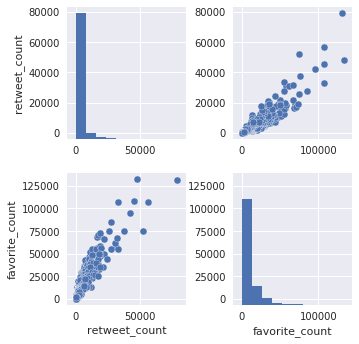

In [284]:
sns.pairplot(final_copy, vars=["retweet_count", "favorite_count"]);

In [285]:
retweet_ = final_copy['retweet_count'].resample('1w').mean()
favorite_ = final_copy['favorite_count'].resample('1w').mean()

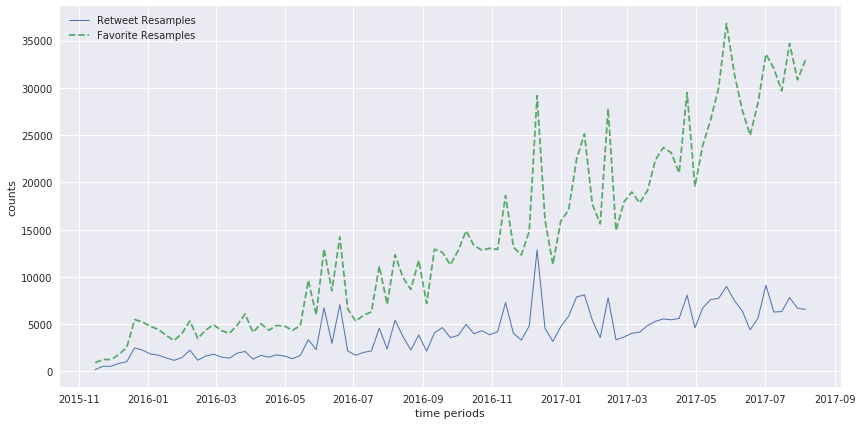

In [286]:
# plotting the counts over time
sns.set(rc={'figure.figsize':(14, 7)})
fig, ax = plt.subplots()
ax.plot(retweet_, linestyle='-', linewidth=1, label='Retweet Resamples')
ax.plot(favorite_, markersize=5, linestyle='--', label='Favorite Resamples')
ax.set_ylabel('counts')
ax.set_xlabel('time periods')
ax.legend();